In [1]:
import torch

#Basic

In [2]:
a=torch.tensor([[1.,2.],[3.,4.]])
print("a:",a)
print("size of a:", a.shape)
b=torch.tensor([[5.,6.],[7.,8.]])
print("b:",b)
print("size of b:",b.size())

a: tensor([[1., 2.],
        [3., 4.]])
size of a: torch.Size([2, 2])
b: tensor([[5., 6.],
        [7., 8.]])
size of b: torch.Size([2, 2])


In [3]:
print("a+b:", a + b)
print("a-b:", a - b)
print("a*b:", a * b)
print("a/b:", a / b)

print("matmul:", torch.matmul(a,b))
print("mm:", a.mm(b))

a+b: tensor([[ 6.,  8.],
        [10., 12.]])
a-b: tensor([[-4., -4.],
        [-4., -4.]])
a*b: tensor([[ 5., 12.],
        [21., 32.]])
a/b: tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
matmul: tensor([[19., 22.],
        [43., 50.]])
mm: tensor([[19., 22.],
        [43., 50.]])


#GPU Tensor (Check Time)

In [4]:
import time	#시간 측정 코드

CPU

In [5]:
a = torch.rand(10000,10000)
b = torch.rand(10000,10000)

startTime = time.time() 	# 시작 시간 저장

a.matmul(b)	# 작업 코드
 
# 현재시각 - 시작시간 = 실행 시간 (ms)
print("elapsed time: %.2f ms" % ((time.time() - startTime)*1000))

elapsed time: 27336.31 ms


CUDA

In [6]:
a = a.cuda()
b = b.cuda()

startTime = time.time() 	# 시작 시간 저장
 
a.matmul(b)	# 작업 코드
 
# 현재시각 - 시작시간 = 실행 시간 (ms)
print("elapsed time: %.2f ms" % ((time.time() - startTime)*1000))

elapsed time: 80.37 ms


#Autograd
자동-미분 기능 제공 (Back Propagation)

Check Device (CPU or GPU)

In [7]:
import torch

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print(DEVICE)

cuda


Model

In [8]:
BATCH_SIZE = 64
INPUT_SIZE = 1000
HIDDEN_SIZE = 100
OUTPUT_SIZE = 10

In [9]:
x = torch.randn(BATCH_SIZE, 
                INPUT_SIZE, 
                device = DEVICE, 
                dtype = torch.float, 
                requires_grad = False)  
print("size of x:", x.size())

y = torch.randn(BATCH_SIZE, 
                OUTPUT_SIZE, 
                device = DEVICE,
                dtype = torch.float, 
                requires_grad = False)  
print("size of y:", y.size())

#weight
w1 = torch.randn(INPUT_SIZE, 
                 HIDDEN_SIZE, 
                 device = DEVICE, 
                 dtype = torch.float,
                 requires_grad = True)  
print("size of w1:", w1.size())

w2 = torch.randn(HIDDEN_SIZE,
                 OUTPUT_SIZE, 
                 device = DEVICE,
                 dtype = torch.float,
                 requires_grad = True)
print("size of w2:", w2.size())  

size of x: torch.Size([64, 1000])
size of y: torch.Size([64, 10])
size of w1: torch.Size([1000, 100])
size of w2: torch.Size([100, 10])


In [10]:
learning_rate = 1e-6     #learning rate란?
for t in range(1, 1001):
    y_pred = x.mm(w1).clamp(min = 0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 0:
        print("Iteration: ", t, "\t", "Loss: ", loss.item())
    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        w1.grad.zero_()
        w2.grad.zero_()

Iteration:  100 	 Loss:  143.39950561523438
Iteration:  200 	 Loss:  0.1276165246963501
Iteration:  300 	 Loss:  0.00039748899871483445
Iteration:  400 	 Loss:  3.185666719218716e-05
Iteration:  500 	 Loss:  1.1460930181783624e-05
Iteration:  600 	 Loss:  6.552605100296205e-06
Iteration:  700 	 Loss:  4.536672349786386e-06
Iteration:  800 	 Loss:  3.2497259780939203e-06
Iteration:  900 	 Loss:  2.4789505914668553e-06
Iteration:  1000 	 Loss:  1.9612093637988437e-06


#Example

In [11]:
import torch
torch.__version__

import numpy as np
import matplotlib.pyplot as plt

from torch.autograd import Variable

# 학습 데이터
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167, 7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

def plot_variable(x,y,z='',**kwargs):
    l = []
    for a in [x,y]:
        l.append(a.data.numpy())
    plt.plot(l[0],l[1],z,**kwargs)

def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data


def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

tensor(790.8394)
tensor(3.2543)
tensor(3.2284)
tensor(3.2036)
tensor(3.1798)
tensor(3.1570)
tensor(3.1351)
tensor(3.1141)
tensor(3.0940)
tensor(3.0746)


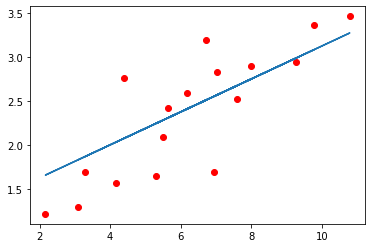

In [12]:
learning_rate = 1e-4

x,y = get_data()               # x - 학습 데이터, y - 목적 변수(Target Variables)
w,b = get_weights()           # w,b - 학습 파라미터
for i in range(500):
    y_pred = simple_network(x) # wx + b를 계산하는 함수
    loss = loss_fn(y,y_pred)   # y와 y_pred의 차의 제곱 합을 계산
    if i % 50 == 0: 
        print(loss)
    optimize(learning_rate)    # 오차를 최소화하도록 w, b를 조정

plot_variable(x,y,'ro')
plot_variable(x,y_pred,label='Fitted line')

#MNIST_MLP

Module Import

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

Check Device

In [14]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.10.0+cu111  Device: cuda


Hyper parameter

In [15]:
BATCH_SIZE = 32  #BATCH_SIZE란?
EPOCHS = 10     #EPOCHS이란?  #원하는 값으로 설정

#전체 데이터가 1,000개라고 하면 100개씩 쪼개서 10번 Feed Forward와 Back Propagation을 반복
#이 한 과정을 Epoch(세대)라고 하고 여기서 데이터의 크기 100에 대해서는 Batch Size라 부름

Download Mnist DB

In [16]:
!pwd          #다운받는 위치

/content


In [17]:
!ls

sample_data


In [18]:
train_dataset = datasets.MNIST(root = "./data/MNIST",          #다운받을 위치
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "./data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw



Dataloader

In [19]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)         #셔플 해주기

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)        #셔플 굳이 할 필요 없음

##shuffle하는 이유?
#데이터분포가 어떻게 돼있는지 모르므로 제대로 학습안될수있음 ->섞어주기
                                

Check Data

In [20]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())    
    ##32는 배치 사이즈, 1은 흑백(3은 컬러), 이미지사이즈는 28*28
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Show Data

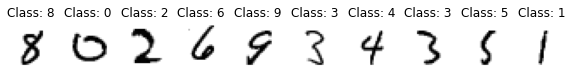

In [21]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

Model

In [22]:
class Net(nn.Module):         #전체적인 네트워크 구조   ##요부분만 수정
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        #값은 만드는 사람 마음! 적당히 하면서 적당한 값 찾기

        self.dropout_prob = 0.3

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob) ###
        x = self.fc2(x)
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob) ###
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [23]:
Net()

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

Optimizer, Objective Function

In [24]:
model = Net().to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)  
 #파라미터는 weight들. momentum은 바꿀 필요 없음

#Q.SGD를 Adam으로 바꾸세요
#optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, momentum = 0.5)  

criterion = nn.CrossEntropyLoss()    #그때그때 바꿔주기

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


Train

In [25]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
       #loss 등 의미하는 것들 다 알아두기
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

Validation (Evaluation)

In [26]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

Run

In [27]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))
    #train loss랑 test loss랑 비슷하게 떨어져야함
    #한쪽은 덜 떨어지면 overfitting된것이므로 일반화시켜줘야함

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.300043
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.006500
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 0.890697
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 0.564731
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 0.771010
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 0.443186
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 0.712368
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 0.392708
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 0.548594
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 0.331193

[EPOCH: 1], 	Test Loss: 0.3108, 	Test Accuracy: 91.33 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 0.212821
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 0.369650
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 0.453102
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 0.390195
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 0.334934
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 0.439366
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 0.207767
T

#Chapter 3

##MNIST_MLP with Dropout

**Model** with Dropout

In [28]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5                                           ###

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob) ###
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob) ###
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

Optimizer, Objective Function

In [29]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


Run

In [30]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.436941


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.366750
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 2.340912
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 2.350975
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 2.264506
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 2.327285
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 2.337764
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 2.367437
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 2.280603
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 2.241598

[EPOCH: 1], 	Test Loss: 2.2802, 	Test Accuracy: 19.34 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 2.284777
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 2.282429
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 2.272727
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 2.256048
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 2.306017
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 2.245997
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 2.190395
Train Epoch: 2 [44800/60000 (75%)]	Train Loss: 2.126

##MNIST_MLAP with Dropout+ReLU

Model with Dropout + ReLU

In [31]:
class Net(nn.Module):    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)      #(이미지사이즈, 그냥 준거) (최초input, output) 
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        #몇개만들지는 만드는 사람 마음
        #fc1,fc2, fc3....많아지면 overfiting 위험 (많다고 좋지 않음)
        self.dropout_prob = 0.5

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)   ###
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc2(x)
        x = F.relu(x)   ###
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

Optimizer, Objective Function

In [32]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [33]:
Net()


Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

Run

In [34]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.296025
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.020033
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 1.074037
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 0.629123
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 0.534961
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 0.673758
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 0.457552
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 0.638577
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 0.735509
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 0.604060

[EPOCH: 1], 	Test Loss: 0.3257, 	Test Accuracy: 90.76 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 0.362707
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 0.349512
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 0.499099
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 0.344380
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 0.345074
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 0.507217
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 0.293667
T

##MNIST_MLAP with Dropout+ReLU+BN

Model with Dropout + ReLU + BN


In [35]:
class Net(nn.Module):         #의미하는거 다 알아야함
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5
        self.batch_norm1 = nn.BatchNorm1d(512)  ###
        self.batch_norm2 = nn.BatchNorm1d(256)  ###

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.batch_norm1(x)                 ###
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc2(x)
        x = self.batch_norm2(x)                 ###
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

Optimizer, Objective Function

In [36]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()          #CrossEntropyLoss()랑 softmax랑 세트
#loss를 잘 설정해야함

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


Run

In [37]:
# Q.loss랑 accuracy가 의미하는것  
#loss랑 accuracy의 관계가 무조건 비례하는건 아님 

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.468844
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 0.646444
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 0.509820
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 0.438722
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 0.243766
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 0.249945
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 0.265129
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 0.337776
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 0.403998
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 0.616309

[EPOCH: 1], 	Test Loss: 0.1542, 	Test Accuracy: 95.36 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 0.408682
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 0.257067
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 0.130245
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 0.399979
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 0.312715
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 0.311702
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 0.161976
T

##MNIST_MLAP with Dropout+ReLU+BN+He

Model with Dropout + ReLU + BN


In [38]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.batch_norm2 = nn.BatchNorm1d(256)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.batch_norm1(x)                 
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc2(x)
        x = self.batch_norm2(x)         
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

Optimizer, Objective Function with He initialization

In [39]:
import torch.nn.init as init                    ###
def weight_init(m):                             ###
    if isinstance(m, nn.Linear):                ###
        init.kaiming_uniform_(m.weight.data)    ###

model = Net().to(DEVICE)
model.apply(weight_init)                        ###
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


Run

In [40]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.967723
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 0.687664
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 0.635457
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 0.534250
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 0.160725
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 0.522080
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 0.589570
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 0.660109
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 0.473984
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 0.355270

[EPOCH: 1], 	Test Loss: 0.2203, 	Test Accuracy: 93.65 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 0.667097
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 0.252263
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 0.198642
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 0.573824
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 0.326833
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 0.353579
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 0.386473
T

##MNIST_MLAP with Dropout+ReLU+BN+He+Adam

Model with Dropout + ReLU + BN


In [41]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.batch_norm2 = nn.BatchNorm1d(256)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.batch_norm1(x)                 
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc2(x)
        x = self.batch_norm2(x)         
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

Optimizer, Objective Function with He initialization + Adam Optimizer

In [42]:
import torch.nn.init as init                    
def weight_init(m):                             
    if isinstance(m, nn.Linear):                
        init.kaiming_uniform_(m.weight.data)    

model = Net().to(DEVICE)
model.apply(weight_init)                        
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01) ###
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


Run

In [43]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 3.025979
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 0.973422
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 0.595212
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 0.451281
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 0.371203
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 0.691932
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 0.273403
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 0.302332
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 0.034832
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 0.136472

[EPOCH: 1], 	Test Loss: 0.1335, 	Test Accuracy: 95.87 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 0.328970
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 0.128493
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 0.262278
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 0.126670
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 0.088035
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 0.239952
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 0.154254
T

##AutoEncoder

Module Import

In [44]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

Check Device (CPU or GPU)

In [45]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.10.0+cu111  Device: cuda


Hyper parameter

In [46]:
BATCH_SIZE = 32
EPOCHS = 10

Download FashionMNIST DB

In [47]:
train_dataset = datasets.FashionMNIST(root = "./data/FashionMNIST",
                                      train = True,
                                      download = True,
                                      transform = transforms.ToTensor())

test_dataset = datasets.FashionMNIST(root = "./data/FashionMNIST",
                                     train = False,
                                     transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



Check Data

In [48]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Show Data

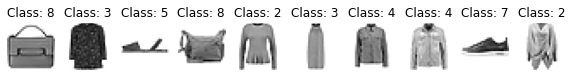

In [49]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

Design Model

In [50]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 32),)
        
        self.decoder = nn.Sequential(
            nn.Linear(32, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

Optimizer, Objective Function

In [51]:
model = AE().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.MSELoss()

print(model)

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
  )
)


Train

In [52]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, _) in enumerate(train_loader):
        image = image.view(-1, 28 * 28).to(DEVICE)
        target = image.view(-1, 28 * 28).to(DEVICE)
        optimizer.zero_grad()
        encoded, decoded = model(image)
        loss = criterion(decoded, target)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

Validation (Evaluation)

In [53]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    real_image = []
    gen_image = []
    with torch.no_grad():
        for image, _ in test_loader:
            image = image.view(-1, 28 * 28).to(DEVICE)
            target = image.view(-1, 28 * 28).to(DEVICE)
            encoded, decoded = model(image)
            
            test_loss += criterion(decoded, image).item()
            real_image.append(image.to("cpu"))
            gen_image.append(decoded.to("cpu"))
            
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)

    return test_loss, real_image, gen_image

Run

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 0.232588
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 0.023961
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 0.025612
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 0.025050
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 0.020639
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 0.017454
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 0.014544
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 0.018706
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 0.016225
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 0.014073

[EPOCH: 1], 	Test Loss: 0.0154


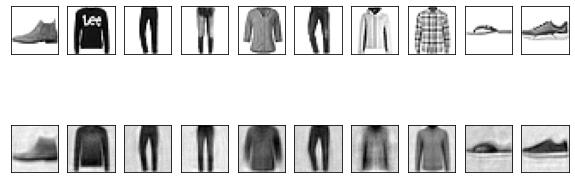

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 0.012140
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 0.019112
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 0.013540
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 0.016409
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 0.014028
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 0.013079
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 0.012653
Train Epoch: 2 [44800/60000 (75%)]	Train Loss: 0.013702
Train Epoch: 2 [51200/60000 (85%)]	Train Loss: 0.011631
Train Epoch: 2 [57600/60000 (96%)]	Train Loss: 0.011717

[EPOCH: 2], 	Test Loss: 0.0130


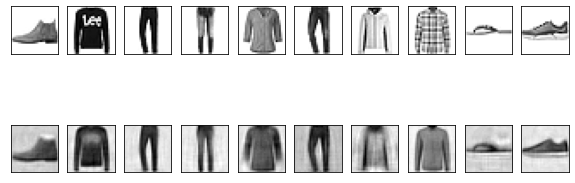

Train Epoch: 3 [0/60000 (0%)]	Train Loss: 0.014163
Train Epoch: 3 [6400/60000 (11%)]	Train Loss: 0.013342
Train Epoch: 3 [12800/60000 (21%)]	Train Loss: 0.012118
Train Epoch: 3 [19200/60000 (32%)]	Train Loss: 0.012318
Train Epoch: 3 [25600/60000 (43%)]	Train Loss: 0.012947
Train Epoch: 3 [32000/60000 (53%)]	Train Loss: 0.010118
Train Epoch: 3 [38400/60000 (64%)]	Train Loss: 0.011102
Train Epoch: 3 [44800/60000 (75%)]	Train Loss: 0.009939
Train Epoch: 3 [51200/60000 (85%)]	Train Loss: 0.012356
Train Epoch: 3 [57600/60000 (96%)]	Train Loss: 0.013534

[EPOCH: 3], 	Test Loss: 0.0119


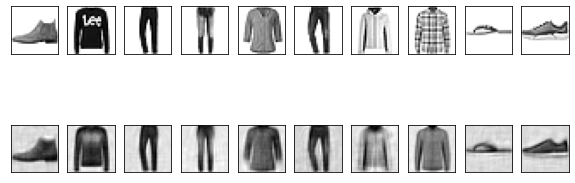

Train Epoch: 4 [0/60000 (0%)]	Train Loss: 0.011346
Train Epoch: 4 [6400/60000 (11%)]	Train Loss: 0.010736
Train Epoch: 4 [12800/60000 (21%)]	Train Loss: 0.012049
Train Epoch: 4 [19200/60000 (32%)]	Train Loss: 0.013697
Train Epoch: 4 [25600/60000 (43%)]	Train Loss: 0.009642
Train Epoch: 4 [32000/60000 (53%)]	Train Loss: 0.010405
Train Epoch: 4 [38400/60000 (64%)]	Train Loss: 0.010763
Train Epoch: 4 [44800/60000 (75%)]	Train Loss: 0.014890
Train Epoch: 4 [51200/60000 (85%)]	Train Loss: 0.010337
Train Epoch: 4 [57600/60000 (96%)]	Train Loss: 0.009800

[EPOCH: 4], 	Test Loss: 0.0112


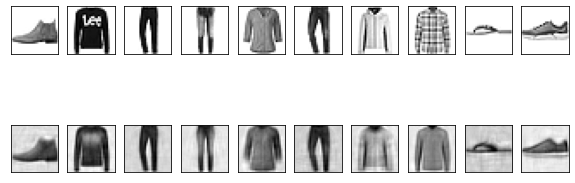

Train Epoch: 5 [0/60000 (0%)]	Train Loss: 0.011468
Train Epoch: 5 [6400/60000 (11%)]	Train Loss: 0.011071
Train Epoch: 5 [12800/60000 (21%)]	Train Loss: 0.010297
Train Epoch: 5 [19200/60000 (32%)]	Train Loss: 0.012424
Train Epoch: 5 [25600/60000 (43%)]	Train Loss: 0.012276
Train Epoch: 5 [32000/60000 (53%)]	Train Loss: 0.009141
Train Epoch: 5 [38400/60000 (64%)]	Train Loss: 0.009165
Train Epoch: 5 [44800/60000 (75%)]	Train Loss: 0.010641
Train Epoch: 5 [51200/60000 (85%)]	Train Loss: 0.010826
Train Epoch: 5 [57600/60000 (96%)]	Train Loss: 0.012288

[EPOCH: 5], 	Test Loss: 0.0107


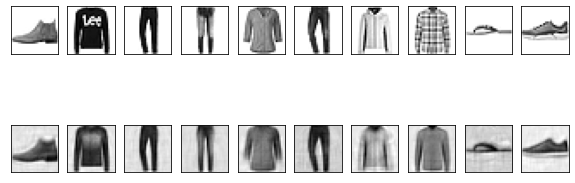

Train Epoch: 6 [0/60000 (0%)]	Train Loss: 0.009915
Train Epoch: 6 [6400/60000 (11%)]	Train Loss: 0.010866
Train Epoch: 6 [12800/60000 (21%)]	Train Loss: 0.009088
Train Epoch: 6 [19200/60000 (32%)]	Train Loss: 0.011439
Train Epoch: 6 [25600/60000 (43%)]	Train Loss: 0.010291
Train Epoch: 6 [32000/60000 (53%)]	Train Loss: 0.008963
Train Epoch: 6 [38400/60000 (64%)]	Train Loss: 0.010528
Train Epoch: 6 [44800/60000 (75%)]	Train Loss: 0.010983
Train Epoch: 6 [51200/60000 (85%)]	Train Loss: 0.009189
Train Epoch: 6 [57600/60000 (96%)]	Train Loss: 0.007694

[EPOCH: 6], 	Test Loss: 0.0106


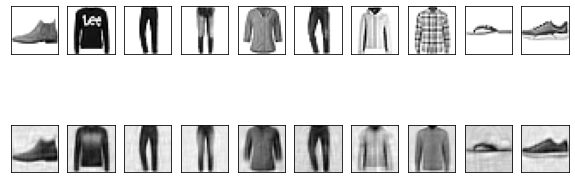

Train Epoch: 7 [0/60000 (0%)]	Train Loss: 0.010518
Train Epoch: 7 [6400/60000 (11%)]	Train Loss: 0.012499
Train Epoch: 7 [12800/60000 (21%)]	Train Loss: 0.010307
Train Epoch: 7 [19200/60000 (32%)]	Train Loss: 0.010768
Train Epoch: 7 [25600/60000 (43%)]	Train Loss: 0.010062
Train Epoch: 7 [32000/60000 (53%)]	Train Loss: 0.009623
Train Epoch: 7 [38400/60000 (64%)]	Train Loss: 0.009584
Train Epoch: 7 [44800/60000 (75%)]	Train Loss: 0.009427
Train Epoch: 7 [51200/60000 (85%)]	Train Loss: 0.009885
Train Epoch: 7 [57600/60000 (96%)]	Train Loss: 0.009396

[EPOCH: 7], 	Test Loss: 0.0102


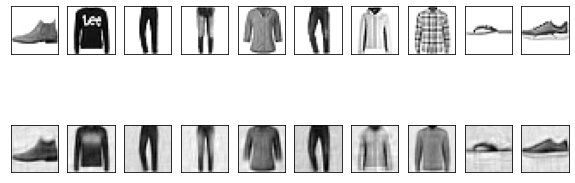

Train Epoch: 8 [0/60000 (0%)]	Train Loss: 0.009774
Train Epoch: 8 [6400/60000 (11%)]	Train Loss: 0.008982
Train Epoch: 8 [12800/60000 (21%)]	Train Loss: 0.009842
Train Epoch: 8 [19200/60000 (32%)]	Train Loss: 0.010616
Train Epoch: 8 [25600/60000 (43%)]	Train Loss: 0.009745
Train Epoch: 8 [32000/60000 (53%)]	Train Loss: 0.009351
Train Epoch: 8 [38400/60000 (64%)]	Train Loss: 0.009883
Train Epoch: 8 [44800/60000 (75%)]	Train Loss: 0.007516
Train Epoch: 8 [51200/60000 (85%)]	Train Loss: 0.008955
Train Epoch: 8 [57600/60000 (96%)]	Train Loss: 0.009212

[EPOCH: 8], 	Test Loss: 0.0100


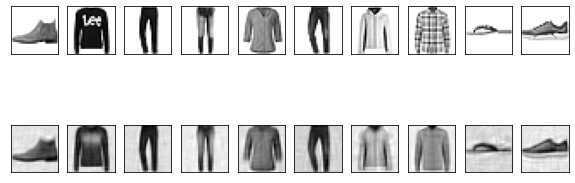

Train Epoch: 9 [0/60000 (0%)]	Train Loss: 0.010305
Train Epoch: 9 [6400/60000 (11%)]	Train Loss: 0.009384
Train Epoch: 9 [12800/60000 (21%)]	Train Loss: 0.009722
Train Epoch: 9 [19200/60000 (32%)]	Train Loss: 0.008241
Train Epoch: 9 [25600/60000 (43%)]	Train Loss: 0.009013
Train Epoch: 9 [32000/60000 (53%)]	Train Loss: 0.010008
Train Epoch: 9 [38400/60000 (64%)]	Train Loss: 0.012080
Train Epoch: 9 [44800/60000 (75%)]	Train Loss: 0.010000
Train Epoch: 9 [51200/60000 (85%)]	Train Loss: 0.008673
Train Epoch: 9 [57600/60000 (96%)]	Train Loss: 0.011856

[EPOCH: 9], 	Test Loss: 0.0099


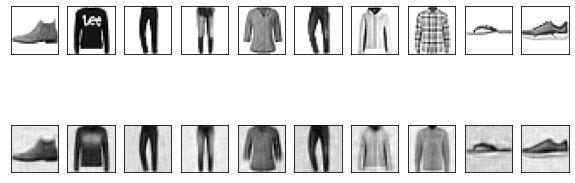

Train Epoch: 10 [0/60000 (0%)]	Train Loss: 0.008926
Train Epoch: 10 [6400/60000 (11%)]	Train Loss: 0.008268
Train Epoch: 10 [12800/60000 (21%)]	Train Loss: 0.008644
Train Epoch: 10 [19200/60000 (32%)]	Train Loss: 0.008638
Train Epoch: 10 [25600/60000 (43%)]	Train Loss: 0.008307
Train Epoch: 10 [32000/60000 (53%)]	Train Loss: 0.008944
Train Epoch: 10 [38400/60000 (64%)]	Train Loss: 0.007607
Train Epoch: 10 [44800/60000 (75%)]	Train Loss: 0.008207
Train Epoch: 10 [51200/60000 (85%)]	Train Loss: 0.010770
Train Epoch: 10 [57600/60000 (96%)]	Train Loss: 0.010988

[EPOCH: 10], 	Test Loss: 0.0098


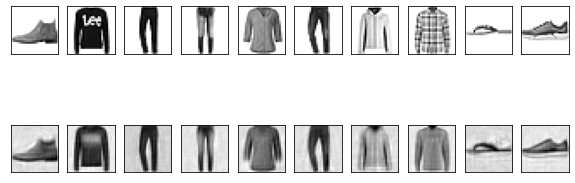

In [54]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, real_image, gen_image = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}".format(epoch, test_loss))
    f, a = plt.subplots(2, 10, figsize = (10, 4))
    for i in range(10):
        img = np.reshape(real_image[0][i], (28, 28))
        a[0][i].imshow(img, cmap = "gray_r")
        a[0][i].set_xticks(())
        a[0][i].set_yticks(())
    
    for i in range(10):
        img = np.reshape(gen_image[0][i], (28, 28))
        a[1][i].imshow(img, cmap = "gray_r")
        a[1][i].set_xticks(())
        a[1][i].set_yticks(())
    plt.show()

#Chapter 4. Computer Vision

##CIFAR_MLP

Module Import

In [55]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

Check Device

In [56]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.10.0+cu111  Device: cuda


Hyper Parameter

In [57]:
BATCH_SIZE = 32
EPOCHS = 10

Download Data

In [58]:
train_dataset = datasets.CIFAR10(root = "./data/CIFAR_10",
                                  train = True,
                                  download = True,
                                  transform = transforms.ToTensor())

test_dataset = datasets.CIFAR10(root = "./data/CIFAR_10",
                                train = False,
                                transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/CIFAR_10/cifar-10-python.tar.gz to ./data/CIFAR_10


Check Data

In [59]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Show Data

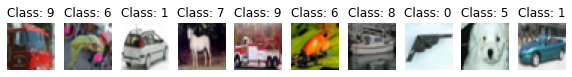

In [60]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

Design Model

In [61]:
class Net(nn.Module):   #이거보면 뭘 얘기(하는지 다 알아야함
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
  #Linear가 의미하는건 fully connected layers
  #Pooling Layer에 나온 Feature들을 Flatten 시켜서 (풀어 헤쳐서) MLP의 Input으로 놓고 학습을 진행

    def forward(self, x):
        x = x.view(-1,32 * 32 * 3)      # #flatten
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

Optimizer, Objective Function

In [62]:
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
#learning rate(학습률): Gradient의 크기를 조절해주는 상수
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


Train

In [63]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)   #cuda에 올려서 계산하도록
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()     #최종적으로 업데이트

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

Evaluation

In [64]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

Run

In [65]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.328719
Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 1.856392
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 1.896256
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 2.044918
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.682092
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 1.759917
Train Epoch: 1 [38400/50000 (77%)]	Train Loss: 1.471626
Train Epoch: 1 [44800/50000 (90%)]	Train Loss: 1.640438

[EPOCH: 1], 	Test Loss: 1.6716, 	Test Accuracy: 39.95 % 

Train Epoch: 2 [0/50000 (0%)]	Train Loss: 1.395184
Train Epoch: 2 [6400/50000 (13%)]	Train Loss: 1.658025
Train Epoch: 2 [12800/50000 (26%)]	Train Loss: 1.842839
Train Epoch: 2 [19200/50000 (38%)]	Train Loss: 1.744231
Train Epoch: 2 [25600/50000 (51%)]	Train Loss: 1.823320
Train Epoch: 2 [32000/50000 (64%)]	Train Loss: 1.711710
Train Epoch: 2 [38400/50000 (77%)]	Train Loss: 1.701807
Train Epoch: 2 [44800/50000 (90%)]	Train Loss: 1.601354

[EPOCH: 2], 	Test Loss: 1.6032, 	Test Accuracy: 42.54 % 

##CIFAR_CNN

Design Model

In [66]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, padding = 1)
        #kernel_size = 3, padding = 1 원본사이즈 그대로 되는것 
        #kernel_size = 5, padding = 2 해도 그대로 됨

        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)   
        # stride = 2는 kernel_size = 2였으니까 건너뛰려고   #연산자처럼 사용

        self.fc1 = nn.Linear(8 * 8 * 16, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)
        
    def forward(self, x):
        x = self.conv1(x) # 32x32x3 -> 32x32x8
        x = F.relu(x)     # 32x32x8
        x = self.pool(x)  # 16x16x8
        x = self.conv2(x) # 16x16x8 -> 16x16x16
        x = F.relu(x)     # 16x16x16
        x = self.pool(x)  # 8x8x16
        
        x = x.view(-1, 8 * 8 * 16)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x)
        return x

Optimizer, Objective Function

In [67]:
model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


Run

In [68]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.297723


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 1.947203
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 1.688288
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 1.597369
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.705929
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 1.390276
Train Epoch: 1 [38400/50000 (77%)]	Train Loss: 1.608659
Train Epoch: 1 [44800/50000 (90%)]	Train Loss: 1.514807

[EPOCH: 1], 	Test Loss: 1.4672, 	Test Accuracy: 45.94 % 

Train Epoch: 2 [0/50000 (0%)]	Train Loss: 1.328764
Train Epoch: 2 [6400/50000 (13%)]	Train Loss: 1.711875
Train Epoch: 2 [12800/50000 (26%)]	Train Loss: 1.329055
Train Epoch: 2 [19200/50000 (38%)]	Train Loss: 1.455549
Train Epoch: 2 [25600/50000 (51%)]	Train Loss: 1.326344
Train Epoch: 2 [32000/50000 (64%)]	Train Loss: 1.691906
Train Epoch: 2 [38400/50000 (77%)]	Train Loss: 1.414423
Train Epoch: 2 [44800/50000 (90%)]	Train Loss: 1.275130

[EPOCH: 2], 	Test Loss: 1.3581, 	Test Accuracy: 51.31 % 

Train Epoch: 3 [0/50000 (0%)]	Train Loss: 0.95195

~중간고사 범위

##CIFAR_CNN_Augmentation

> 9주차(1102)

#Data Augmentation
-데이터를 임의로 변형시켜 데이터의 수를 늘려 다양한 feature를 뽑는 방법

-이미지 분류 문제에서 Data Augmentation을 할 경우에 성능이 소폭 상승한다

 - Random Flip: 좌우/상하 반전
 - Rotation: 회전
 -Crop: 이미지의 일정부분을 잘라버림
 -Scaling: 확대/축소          ***
 -Cutout: 이미지의 일부를 검은색으로
 -Cutmix: 두 이미지를 합쳐 각각의 이미지가 차지하는 비율만큼 학습시킴

Module Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

Check Device

In [ ]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.10.0+cu111  Device: cuda


Hyper Parameter

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

Download Data with Augmentation

In [ ]:
train_dataset = datasets.CIFAR10(root = "./data/CIFAR_10",
                                  train = True,
                                  download = True,
                                  transform = transforms.Compose([
                                    transforms.RandomHorizontalFlip(),   #이게 data augmentation한거! 0.5퍼 확률로 데이터를 반전시킴
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))   
                  #표준화 #mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)

#위와 똑같음
test_dataset = datasets.CIFAR10(root = "./data/CIFAR_10",
                                train = False,
                                transform = transforms.Compose([
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

Files already downloaded and verified


Check Data

In [ ]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
     #32는 배치 사이즈, 3은 컬러, 이미지사이즈는 32*32
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Show Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

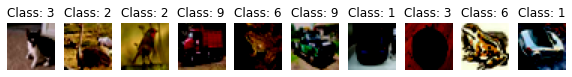

In [ ]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

Design Model

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)    #input(이미지사이즈*채널수3개), output(내 맘대로)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)    #목표는 10(맘대로 정하기)으로 가는거!

    def forward(self, x):
        x = x.view(-1,32 * 32 * 3)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

Optimizer, Objective Function

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)    ##optimizer  #네트워크 아키텍처 최적화
criterion = nn.CrossEntropyLoss()  #오차함수 #Cross-entropy Loss는 분류문제에 주로 사용

print(model)

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


Train

In [ ]:
def train(model, train_loader, optimizer, log_interval):
    model.train()   ##train() 함수는 module을 training mode로 설정
#붙여주는 이유? 테스트할때 쓰는 모듈, train할때 쓰는 모듈 다르기때문에?

    for batch_idx, (image, label) in enumerate(train_loader):   ##for input, target in dataset:
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()       ##
        output = model(image)       ##output = model(input)
        loss = criterion(output, label)       ##loss = loss_fn(output, target)
        loss.backward()       ##
        optimizer.step()      ##

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

Evaluation

In [ ]:
def evaluate(model, test_loader):
    model.eval()     ##eval() 함수는 module을 test mode로 설정

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

Run

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.298136
Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 1.837497
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 1.764480
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 1.479521
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.824930
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 1.833422
Train Epoch: 1 [38400/50000 (77%)]	Train Loss: 1.382045
Train Epoch: 1 [44800/50000 (90%)]	Train Loss: 1.344080

[EPOCH: 1], 	Test Loss: 1.5354, 	Test Accuracy: 45.52 % 

Train Epoch: 2 [0/50000 (0%)]	Train Loss: 1.425842
Train Epoch: 2 [6400/50000 (13%)]	Train Loss: 1.290334
Train Epoch: 2 [12800/50000 (26%)]	Train Loss: 1.654028
Train Epoch: 2 [19200/50000 (38%)]	Train Loss: 1.315190
Train Epoch: 2 [25600/50000 (51%)]	Train Loss: 1.830553
Train Epoch: 2 [32000/50000 (64%)]	Train Loss: 1.251725
Train Epoch: 2 [38400/50000 (77%)]	Train Loss: 1.762137
Train Epoch: 2 [44800/50000 (90%)]	Train Loss: 1.657744

[EPOCH: 2], 	Test Loss: 1.4501, 	Test Accuracy: 48.93 % 

##CIFAR_ResNet


#다양한 CNN 구조

- LeNet

- AlexNet

- VGG 

- GoogLeNet

- Residual Network(ResNet)

> *   이미지 분류의 정석적인 기본 모델

> *   Skip Connection: 이전 layer의 Feature Map을 다음 Layer의 Feature Map에 더해주는 개념

>  *  "F(x)= y-x"       
이거만 학습하면 됨!!!!

ex 고화질로 바꾸는 작업: 저화질이미지 정보는 필요없고,
저화질과 고화질의 차이만 학습하면 됨


- Dense Network(DenseNet)






ResNet

In [ ]:
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride = 1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size = 3, stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(planes)
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size = 1, stride = stride, bias = False),
                nn.BatchNorm2d(planes))
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out
    
class ResNet(nn.Module):
    def __init__(self, num_classes = 10):
        super(ResNet, self).__init__()
        self.in_planes = 16
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(16, 2, stride = 1)
        self.layer2 = self._make_layer(32, 2, stride = 2)
        self.layer3 = self._make_layer(64, 2, stride = 2)   #stride로 사이즈 줄여줌
        self.linear = nn.Linear(64, num_classes)
        
    def _make_layer(self, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks  - 1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, 8)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

Optimizer, Objective Function

In [ ]:
model = ResNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)     #residual network 사진자료(pdf 29번째)랑 같이보기!

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

Run

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.339800
Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 1.678011
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 1.523998
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 1.499673
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.078999
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 1.398399
Train Epoch: 1 [38400/50000 (77%)]	Train Loss: 1.222764
Train Epoch: 1 [44800/50000 (90%)]	Train Loss: 0.860613

[EPOCH: 1], 	Test Loss: 1.1075, 	Test Accuracy: 60.03 % 

Train Epoch: 2 [0/50000 (0%)]	Train Loss: 0.838328
Train Epoch: 2 [6400/50000 (13%)]	Train Loss: 0.896641
Train Epoch: 2 [12800/50000 (26%)]	Train Loss: 0.973782
Train Epoch: 2 [19200/50000 (38%)]	Train Loss: 0.899740
Train Epoch: 2 [25600/50000 (51%)]	Train Loss: 0.843491
Train Epoch: 2 [32000/50000 (64%)]	Train Loss: 0.613697
Train Epoch: 2 [38400/50000 (77%)]	Train Loss: 0.837018
Train Epoch: 2 [44800/50000 (90%)]	Train Loss: 1.095178

[EPOCH: 2], 	Test Loss: 0.8722, 	Test Accuracy: 68.82 % 

##Use Pre-trained Model

Load ResNet34 model

In [ ]:
import torchvision.models as models
model = models.resnet34(pretrained = False)    #pretrained = False면 껍데기만 가져온다
print(model)
print("##########################################################")
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
print(model)
model = model.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Optimizer, Objective Function

In [ ]:
model = ResNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

Run

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.371063
Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 1.706335
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 1.368599
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 1.203849
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.035490
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 0.846165
Train Epoch: 1 [38400/50000 (77%)]	Train Loss: 1.028502
Train Epoch: 1 [44800/50000 (90%)]	Train Loss: 1.016410

[EPOCH: 1], 	Test Loss: 1.0140, 	Test Accuracy: 63.40 % 

Train Epoch: 2 [0/50000 (0%)]	Train Loss: 1.407087
Train Epoch: 2 [6400/50000 (13%)]	Train Loss: 0.958800
Train Epoch: 2 [12800/50000 (26%)]	Train Loss: 0.645457
Train Epoch: 2 [19200/50000 (38%)]	Train Loss: 0.867794
Train Epoch: 2 [25600/50000 (51%)]	Train Loss: 0.669978
Train Epoch: 2 [32000/50000 (64%)]	Train Loss: 0.552518
Train Epoch: 2 [38400/50000 (77%)]	Train Loss: 0.940110
Train Epoch: 2 [44800/50000 (90%)]	Train Loss: 0.783056

[EPOCH: 2], 	Test Loss: 0.8087, 	Test Accuracy: 71.80 % 

KeyboardInterrupt: ignored


##기말 문제 1번. Transfer Learning이 무엇인가

- 전이 학습 (Transfer Learning):

데이터가 적은 상황에서 ImageNet 데이터를 미리 학습해 놓은 딥러닝 모델 (Pre-Trained Model)을 가져와서 
***재학습 (Finetuning)*** 시키는 방법

In [ ]:
model = models.resnet34(pretrained = True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)    #몇개를 분류할건지
#model.fc = nn.Linear(num_ftrs, 20)
model = model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.517867
Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 1.281110
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 1.113694
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 0.774500
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.085349
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 0.957978


KeyboardInterrupt: ignored

#<Google Drive 연동>

### 현재 디렉토리 위치 및 목록 확인

In [ ]:
import os
!pwd
!ls

/content
data  sample_data


### 구글드라이브 연동

In [ ]:
# 실행시 등장하는 URL을 클릭하여 허용해주면 인증KEY가 나타난다. 복사하여 URL아래 빈칸에 붙여넣으면 마운트에 성공하게된다.
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# 마운트된 내 드라이브를 확인해보자
!ls

data  gdrive  sample_data


In [ ]:
# 해당 드라이브로 이동 
# 내 드라이브는 원격서버가 아니라 로컬서버로 간주하므로 명령어 실행시 앞단에 !를 붙이지 않는다.
!pwd
import os
os.chdir('/content/gdrive/MyDrive/')
!pwd

/content
/content/gdrive/MyDrive


In [ ]:
# 내드라이브의 전체 목록이 나타난다.
!ls

 8장_리눅스의부팅과종료.pptx		    dogs-vs-cats_train0-valid0.zip
'취업서류 작성 스킬업_C반의 사본.gslides'  '자격요건 검증 동의서_조나연.pdf'
'Colab Notebooks'			   '개인정보 동의서_조나연.pdf'
 Dataset


#Classifier - Dog vs. Cat

##CNN 모델 구축

In [ ]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch import optim
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torch.utils.data import Dataset,DataLoader
import time
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

from torchvision.datasets import ImageFolder
from torch.autograd import Variable
import time

In [ ]:
def imshow(inp,cmap=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp,cmap)

In [ ]:
is_cuda=False
if torch.cuda.is_available():
    is_cuda = True

print("is_cuda:",is_cuda)

is_cuda: True


Dataset

In [ ]:
cd /content/gdrive/MyDrive/Dataset

/content/gdrive/MyDrive/Dataset


In [ ]:
pwd

'/content/gdrive/MyDrive/Dataset'

In [ ]:
ls

1.JPG  bg10.JPG  bg1.jpg  bg9.jpg             result.jpg
2.JPG  bg11.JPG  bg3.jpg  dogs-vs-cats/       styles.txt
3.JPG  bg12.jpg  bg4.jpg  hidt.zip            style_transformer.py
4.JPG  bg13.jpg  bg5.jpg  __init__.py         trainers/
5.JPG  bg14.jpg  bg6.jpg  networks/           utils/
6.JPG  bg15.jpg  bg7.JPG  result_blurred.jpg
7.JPG  bg16.jpg  bg8.jpg  result_gray.jpg


In [ ]:
#
import zipfile

fname = 'dogs-vs-cats_train0-valid0.zip'
dataset_zip = zipfile.ZipFile(fname)
dataset_zip.extractall()
 
dataset_zip.close()

In [ ]:
#rm -rf dogs-vs-cats/   #제거

Hyper Parameter

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5

Load data to tensor

In [ ]:
simple_transform = transforms.Compose([transforms.Resize((224,224))
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                      ])
train = ImageFolder('/content/gdrive/MyDrive/Dataset/dogs-vs-cats/train/',simple_transform)
valid = ImageFolder('/content/gdrive/MyDrive/Dataset/dogs-vs-cats/valid/',simple_transform)

In [ ]:
print(train.class_to_idx)
print(train.classes) 

{'cat': 0, 'dog': 1}
['cat', 'dog']


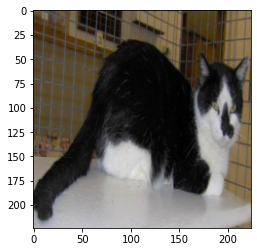

In [ ]:
imshow(valid[770][0])

DataLoader

In [ ]:
train_data_loader = torch.utils.data.DataLoader(train,batch_size=BATCH_SIZE,shuffle=True)
valid_data_loader = torch.utils.data.DataLoader(valid,batch_size=BATCH_SIZE,shuffle=False)  #셔플 굳이 안해도됨

CNN Architecture

In [ ]:
class Net(nn.Module):
    def __init__(self):   #껍데기
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5)    #convolutional layer  -이미지에 많이 쓰이는 거
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(56180, 500)
        self.fc2 = nn.Linear(500,50)
        self.fc3 = nn.Linear(50, 2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))    
        #max_pool2d()함수 이미지사이즈 반 줄임
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))

         #2차원을 바로 입력에 넣을수없으므로 view()함수를 사용하여 1차원으로 펴주기
        x = x.view(x.size(0), -1)   #dimension(차원) 펴준거   #2*2를 한줄짜리 벡터형태로 바꿈
       
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x,training=self.training)
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)   #softmax는  nll_loss랑 세트

In [ ]:
Net()

Net(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=56180, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

In [ ]:
def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile=True
    running_loss = 0.0
    running_correct = 0
    for batch_idx , (data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        data , target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output,target)    #CrossEntropyloss를 쓰면 의미없는거 한번 더 한거?
        #NLL Loss는 분류문제에서 특정가중치를 이용하여 데이터셋 불균형을 처리할때 주로 사용
        
        running_loss += F.nll_loss(output,target,size_average=False).data
        preds = output.data.max(dim=1,keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
    
    loss = running_loss/len(data_loader.dataset)
    accuracy = 100. * running_correct.item()/len(data_loader.dataset)

    print(f'{phase} loss is {loss:{5}.{2}} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)}{accuracy:{10}.{4}}')
    return loss,accuracy

In [ ]:
model = Net()
if is_cuda:
    model.cuda()     #model을 cuda에 넣어준다
is_cuda

True

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.5)

In [ ]:
%%time
train_losses , train_accuracy = [],[]
val_losses , val_accuracy = [],[]
for epoch in range(1,EPOCHS + 1):
    epoch_loss, epoch_accuracy = fit(epoch,model,train_data_loader,phase='training')
    val_epoch_loss , val_epoch_accuracy = fit(epoch,model,valid_data_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


KeyboardInterrupt: ignored

Loss graph

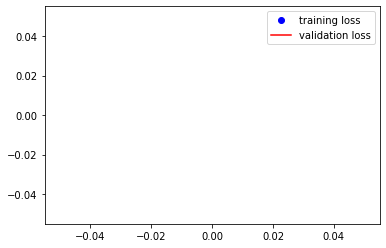

In [ ]:
plt.plot(range(1,len(train_losses)+1),train_losses,'bo',label = 'training loss')
plt.plot(range(1,len(val_losses)+1),val_losses,'r',label = 'validation loss')
plt.legend()

Accuracy graph

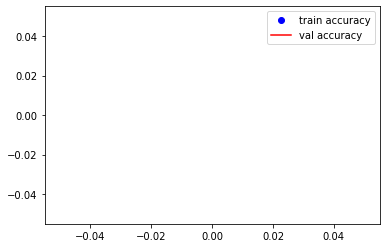

In [ ]:
plt.plot(range(1,len(train_accuracy)+1),train_accuracy,'bo',label = 'train accuracy')
plt.plot(range(1,len(val_accuracy)+1),val_accuracy,'r',label = 'val accuracy')
plt.legend()

## Transfer Learning

In [ ]:
torch.cuda.empty_cache()

### VGG16 모델 생성과 탐색

In [ ]:
from torchvision import models

In [ ]:
vgg = models.vgg16(pretrained=True)
vgg = vgg.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

레이어 고정

In [ ]:
for param in vgg.features.parameters(): param.requires_grad = False
 #gradient(weight) 업데이트를 안하겠다

세부조정 from 1000 to 2

In [ ]:
vgg.classifier[6].out_features = 2
 #out_features = 2로 바뀜

In [ ]:
optimizer = torch.optim.SGD(vgg.classifier.parameters(),lr=0.0001,momentum=0.5)

VGG16 모델 학습

In [ ]:
def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile=True
    running_loss = 0.0
    running_correct = 0
    for batch_idx , (data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        data , target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output,target)
        
        running_loss += F.cross_entropy(output,target,size_average=False).data
        preds = output.data.max(dim=1,keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
    
    loss = running_loss.item() /len(data_loader.dataset)
    accuracy = 100. * running_correct.item()/len(data_loader.dataset)
    
    print(f'{phase} loss is {loss:{5}.{2}} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)}{accuracy:{10}.{4}}')
    return loss,accuracy

In [ ]:
EPOCH = 5

In [ ]:
%%time
train_losses , train_accuracy = [],[]
val_losses , val_accuracy = [],[]
for epoch in range(1,EPOCH + 1):
    epoch_loss, epoch_accuracy = fit(epoch,vgg,train_data_loader,phase='training')
    val_epoch_loss , val_epoch_accuracy = fit(epoch,vgg,valid_data_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


KeyboardInterrupt: ignored

그래프

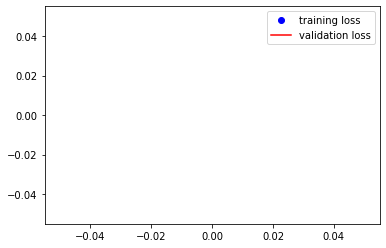

In [ ]:
plt.plot(range(1,len(train_losses)+1),train_losses,'bo',label = 'training loss')
plt.plot(range(1,len(val_losses)+1),val_losses,'r',label = 'validation loss')
plt.legend()

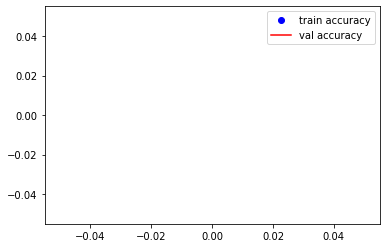

In [ ]:
plt.plot(range(1,len(train_accuracy)+1),train_accuracy,'bo',label = 'train accuracy')
plt.plot(range(1,len(val_accuracy)+1),val_accuracy,'r',label = 'val accuracy')
plt.legend()

#Tokenization

11주차(1116)

In [ ]:
##Vectorization : 문자를 숫자로 표현하는 방법

#토큰화 과정 (Tokenization)
S1 = '나는 책상 위에 사과를 먹었다'       
S2 = '알고 보니 그 사과는 Jason 것이었다' 
S3 = '그래서 Jason에게 사과를 했다'
S4 = '나는 책상 위에 배를 먹었다'

In [ ]:
#토큰화 과정 (Tokenization)

## 1. 문장을 의미있는 부분(단위)로 나눈다. (Text Segmentation)
#ex 띄어쓰기 -> Python의 Split함수 이용
print(S1.split())    #토큰(쪼개진 부분)
print(S2.split())    #토큰
print(S3.split())    #토큰

['나는', '책상', '위에', '사과를', '먹었다']
['알고', '보니', '그', '사과는', 'Jason', '것이었다']
['그래서', 'Jason에게', '사과를', '했다']


In [ ]:
print(list(S1)) #토큰

['나', '는', ' ', '책', '상', ' ', '위', '에', ' ', '사', '과', '를', ' ', '먹', '었', '다']


##Vocabulary

In [ ]:
token2idx = {}
index = 0

for sentence in [S1, S2, S3]:
    tokens = sentence.split()
    for token in tokens:
        if token2idx.get(token) == None:
            token2idx[token] = index   #인덱스는 토큰마다 하나씩 가짐
            index += 1

print(token2idx)    #Vocabulary   #Token을 저장해 놓은 사전인 token2idx을 Vocabulary 라고 한다.

{'나는': 0, '책상': 1, '위에': 2, '사과를': 3, '먹었다': 4, '알고': 5, '보니': 6, '그': 7, '사과는': 8, 'Jason': 9, '것이었다': 10, '그래서': 11, 'Jason에게': 12, '했다': 13}


In [ ]:
def indexed_sentence(sentence):
    return [token2idx[token] for token in sentence]
    
S1_i = indexed_sentence(S1.split())
print(S1_i)
S2_i = indexed_sentence(S2.split())
print(S2_i)
S3_i = indexed_sentence(S3.split())
print(S3_i)      #'사과를'은 3

[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9, 10]
[11, 12, 3, 13]


OOV(Out-of-Vocabulary)

In [ ]:
S4 = '나는 책상 위에 배를 먹었다'

indexed_sentence(S4.split())  # KeyError: '배를'   #일치하는 토큰 없으므로 에러!

KeyError: ignored

In [ ]:
# 기존 token 사전에 "<unk> token 추가"!!  #에러나지않게
token2idx = {t : i+1 for t, i in token2idx.items()}
token2idx['<unk>'] = 0

print(token2idx)

{'나는': 1, '책상': 2, '위에': 3, '사과를': 4, '먹었다': 5, '알고': 6, '보니': 7, '그': 8, '사과는': 9, 'Jason': 10, '것이었다': 11, '그래서': 12, 'Jason에게': 13, '했다': 14, '<unk>': 0}


In [ ]:
#S4 = '나는 책상 위에 배를 먹었다'   #
S5 = '나는 책상 위에 바나나를 먹었다'  #

# token이 없을 경우, <unk> token의 0을 치환
def indexed_sentence_unk(sentence):
    return [token2idx.get(token, token2idx['<unk>']) for token in sentence]

#indexed_sentence_unk(S4.split())  #
indexed_sentence_unk(S5.split())   #

[1, 2, 3, 0, 5]

##n-gram

In [ ]:
S1 = '나는 책상 위에 사과를 먹었다'

print([S1[i:i+1] for i in range(len(S1))]) # uni-gram  #하나하나 토큰
#한칸씩 움직이며 몇개씩 가져가는가?
print([S1[i:i+2] for i in range(len(S1))]) # bi -gram  # 2개
print([S1[i:i+3] for i in range(len(S1))]) # tri-gram   #3개

['나', '는', ' ', '책', '상', ' ', '위', '에', ' ', '사', '과', '를', ' ', '먹', '었', '다']
['나는', '는 ', ' 책', '책상', '상 ', ' 위', '위에', '에 ', ' 사', '사과', '과를', '를 ', ' 먹', '먹었', '었다', '다']
['나는 ', '는 책', ' 책상', '책상 ', '상 위', ' 위에', '위에 ', '에 사', ' 사과', '사과를', '과를 ', '를 먹', ' 먹었', '먹었다', '었다', '다']


#Word Embedding

##One-hot encoding

In [ ]:
#그냥 토큰화. 위랑 같음
S1 = '나는 책상 위에 사과를 먹었다'        
S2 = '알고 보니 그 사과는 Jason 것이었다'  
S3 = '그래서 Jason에게 사과를 했다'       

token2idx = {}
index = 0

for sentence in [S1, S2, S3]:
    tokens = sentence.split()
    for token in tokens:
        if token2idx.get(token) == None:
            token2idx[token] = index
            index += 1

print(token2idx)

{'나는': 0, '책상': 1, '위에': 2, '사과를': 3, '먹었다': 4, '알고': 5, '보니': 6, '그': 7, '사과는': 8, 'Jason': 9, '것이었다': 10, '그래서': 11, 'Jason에게': 12, '했다': 13}


python list

In [ ]:
V = len(token2idx)   #단어 사전의 크기를 V = len(token vocabulary)라 하고
token2idx.items()

token2vec = [([0 if i != idx else 1 for i in range(V)], idx, token) for token, idx in token2idx.items() ]
#겹치는거 있으면 1, 나머지는 0

#V 길이의 모두 0값을 가진 0 벡터를 생성
#각 Token은 그에 해당하는 Index의 값만 1의 값을 가진 벡터로 표현

for x in token2vec:
    print("\t".join([str(y) for y in x]))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	0	나는
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	1	책상
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	2	위에
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	3	사과를
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]	4	먹었다
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]	5	알고
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]	6	보니
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]	7	그
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]	8	사과는
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]	9	Jason
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]	10	것이었다
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]	11	그래서
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]	12	Jason에게
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]	13	했다


python numpy

In [ ]:
import numpy as np

S1 = '나는 책상 위에 사과를 먹었다'        
S2 = '알고 보니 그 사과는 Jason 것이었다'  
S3 = '그래서 Jason에게 사과를 했다'       

token2idx = {}
index = 0

for sentence in [S1, S2, S3]:
    tokens = sentence.split()
    for token in tokens:
        if token2idx.get(token) == None:
            token2idx[token] = index
            index += 1            

for sentence in [S1, S2, S3]:
    onehot_s = []
    tokens = sentence.split()
    for token in tokens:
        if token2idx.get(token) != None:
            vector = np.zeros((1,V))   #토큰 찾아서 벡터화
            vector[:,token2idx[token]] = 1    #해당 값 찾아서 1 줌
            # print(vector)
            onehot_s.append(vector)
        else:
            print("UNK")

    print(f"{sentence} : ")        
    print(np.concatenate(onehot_s, axis = 0))
    print('\n')

나는 책상 위에 사과를 먹었다 : 
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


알고 보니 그 사과는 Jason 것이었다 : 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


그래서 Jason에게 사과를 했다 : 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


